In [1]:
# run command:$ jupyter nbconvert --to notebook --inplace --execute main.ipynb

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import os

2024-04-15 13:02:53.571623: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 13:02:54.949683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# define the scaler
scaler = MinMaxScaler()

# label encoder
label_encoder = LabelEncoder()

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
images = mnist['data']
labels = mnist['target']

# Normalize the data
images_normalized = scaler.fit_transform(images)

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_normalized, labels, test_size=0.1)

# Print the shape of the dataset
print("(Number of images, Shape of images):", images.shape)
print("(Number of labels):", labels.shape)

(Number of images, Shape of images): (70000, 784)
(Number of labels): (70000,)


In [4]:
# Define the SVM model
svm_classifier = SVC(kernel='rbf', C=10, gamma='scale')

# train the model
svm_classifier.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy of SVM classifier:", accuracy)


Accuracy of SVM classifier: 0.9848571428571429


In [5]:
# GBT takes a really long to run
# Define the Gradient Boosting model
clf_gbt = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=2,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    verbose=0,
)

# train the model
clf_gbt.fit(X_train, y_train)

# Evaluate the model
accuracy = clf_gbt.score(X_test, y_test)
print("Accuracy of GBT classifier:", accuracy)

Accuracy of GBT classifier: 0.8502857142857143


In [3]:
# define the Convolutional Neural Network

tensorboard_callback = TensorBoard(log_dir="./logs")

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Convert labels to integer format for CNN
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Reshape data for CNN input, inputs are 28x28 gray scale
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(X_train_reshaped, y_train_encoded, epochs=5, callbacks=[tensorboard_callback])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_reshaped,  y_test_encoded, verbose=0)
print("Accuracy of CNN classifier:", test_acc)


2024-04-15 13:03:02.690153: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 13:03:02.863009: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8992 - loss: 0.3138
Epoch 2/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9866 - loss: 0.0445
Epoch 3/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9901 - loss: 0.0315
Epoch 4/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9931 - loss: 0.0226
Epoch 5/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9936 - loss: 0.0201
Accuracy of CNN classifier: 0.9884285926818848


ModuleNotFoundError: No module named 'seaborn'

219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


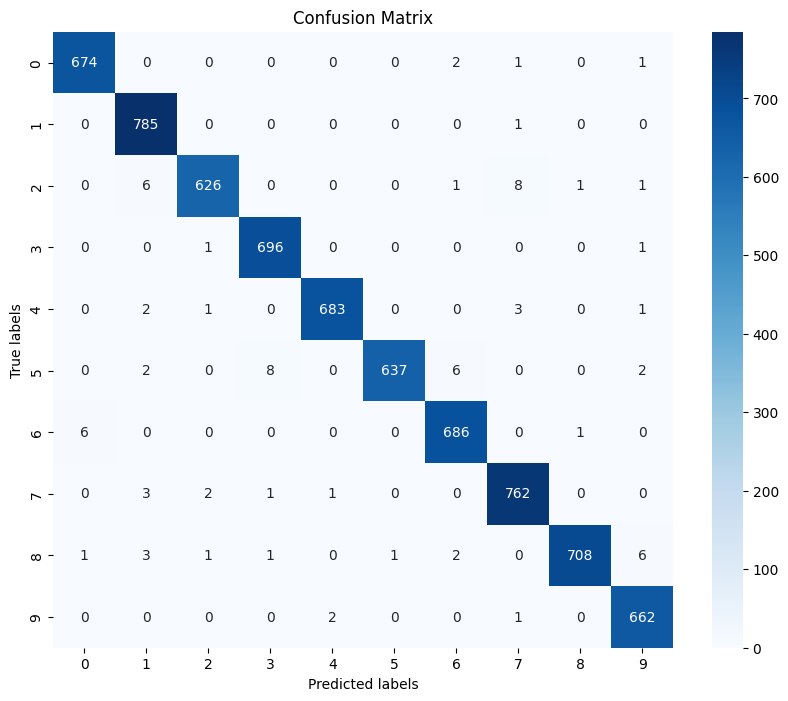

In [4]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test data
y_pred = np.argmax(model.predict(X_test_reshaped), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.00%
Probability of digit 1: 1.34%
Probability of digit 2: 0.04%
Probability of digit 3: 0.31%
Probability of digit 4: 7.11%
Probability of digit 5: 0.15%
Probability of digit 6: 0.00%
Probability of digit 7: 3.47%
Probability of digit 8: 0.17%
Probability of digit 9: 87.40%


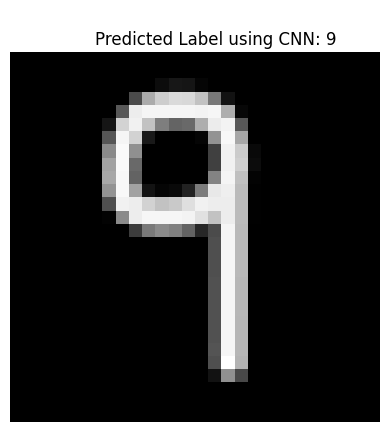

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability of digit 0: 0.02%
Probability of digit 1: 0.00%
Probability of digit 2: 99.87%
Probability of digit 3: 0.02%
Probability of digit 4: 0.00%
Probability of digit 5: 0.00%
Probability of digit 6: 0.00%
Probability of digit 7: 0.03%
Probability of digit 8: 0.04%
Probability of digit 9: 0.00%


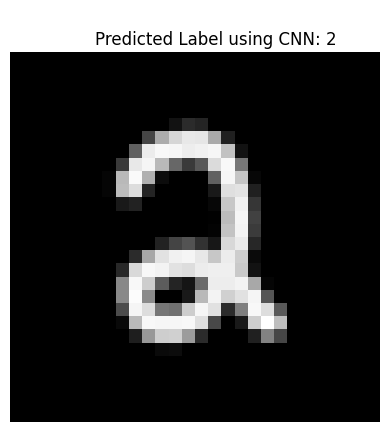

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.00%
Probability of digit 1: 0.03%
Probability of digit 2: 0.00%
Probability of digit 3: 0.00%
Probability of digit 4: 99.74%
Probability of digit 5: 0.00%
Probability of digit 6: 0.00%
Probability of digit 7: 0.00%
Probability of digit 8: 0.00%
Probability of digit 9: 0.22%


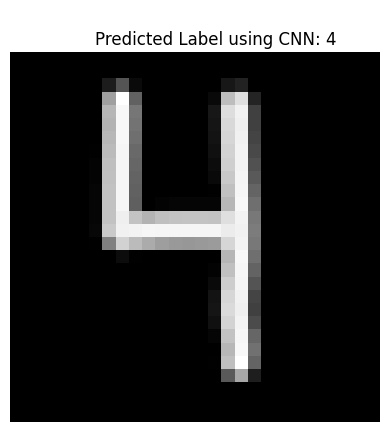

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.03%
Probability of digit 1: 2.92%
Probability of digit 2: 3.55%
Probability of digit 3: 0.09%
Probability of digit 4: 0.11%
Probability of digit 5: 0.01%
Probability of digit 6: 0.00%
Probability of digit 7: 93.15%
Probability of digit 8: 0.10%
Probability of digit 9: 0.04%


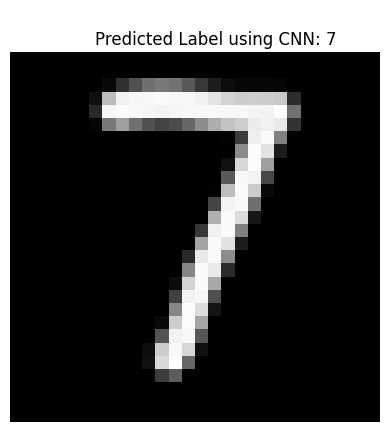

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Probability of digit 0: 0.00%
Probability of digit 1: 0.03%
Probability of digit 2: 0.00%
Probability of digit 3: 0.08%
Probability of digit 4: 0.00%
Probability of digit 5: 99.83%
Probability of digit 6: 0.02%
Probability of digit 7: 0.00%
Probability of digit 8: 0.02%
Probability of digit 9: 0.03%


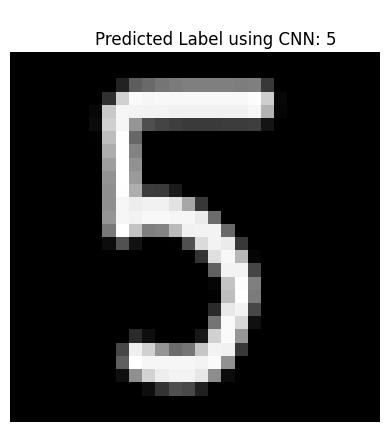

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Probability of digit 0: 0.12%
Probability of digit 1: 0.01%
Probability of digit 2: 0.16%
Probability of digit 3: 1.18%
Probability of digit 4: 0.00%
Probability of digit 5: 1.01%
Probability of digit 6: 0.21%
Probability of digit 7: 0.01%
Probability of digit 8: 97.24%
Probability of digit 9: 0.06%


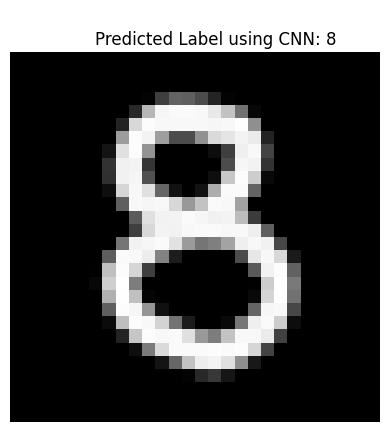

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Probability of digit 0: 0.02%
Probability of digit 1: 0.02%
Probability of digit 2: 99.95%
Probability of digit 3: 0.00%
Probability of digit 4: 0.00%
Probability of digit 5: 0.00%
Probability of digit 6: 0.00%
Probability of digit 7: 0.01%
Probability of digit 8: 0.01%
Probability of digit 9: 0.00%


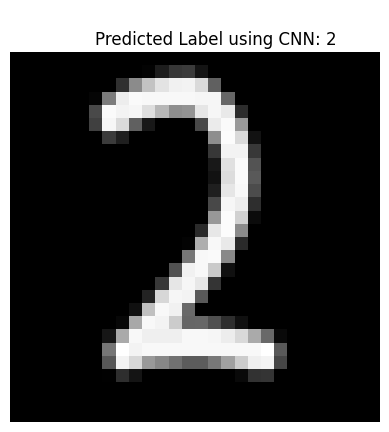

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Probability of digit 0: 0.00%
Probability of digit 1: 0.02%
Probability of digit 2: 0.00%
Probability of digit 3: 99.86%
Probability of digit 4: 0.00%
Probability of digit 5: 0.09%
Probability of digit 6: 0.00%
Probability of digit 7: 0.01%
Probability of digit 8: 0.00%
Probability of digit 9: 0.01%


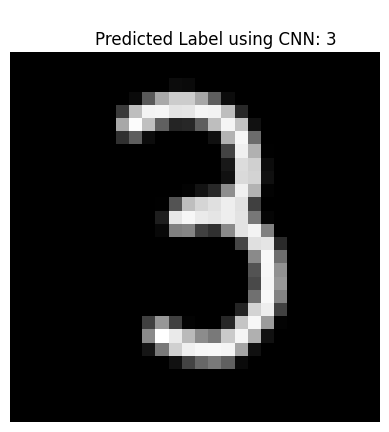

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.06%
Probability of digit 1: 96.16%
Probability of digit 2: 1.34%
Probability of digit 3: 0.32%
Probability of digit 4: 0.02%
Probability of digit 5: 0.39%
Probability of digit 6: 0.03%
Probability of digit 7: 1.61%
Probability of digit 8: 0.06%
Probability of digit 9: 0.02%


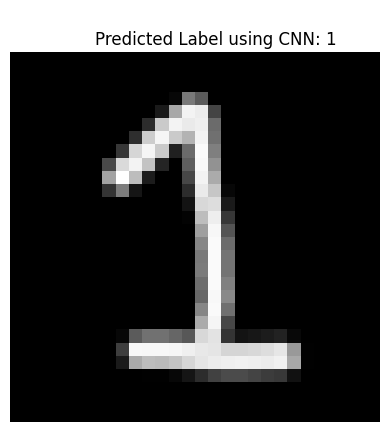

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.05%
Probability of digit 1: 0.00%
Probability of digit 2: 0.00%
Probability of digit 3: 0.00%
Probability of digit 4: 0.00%
Probability of digit 5: 0.53%
Probability of digit 6: 99.36%
Probability of digit 7: 0.00%
Probability of digit 8: 0.05%
Probability of digit 9: 0.01%


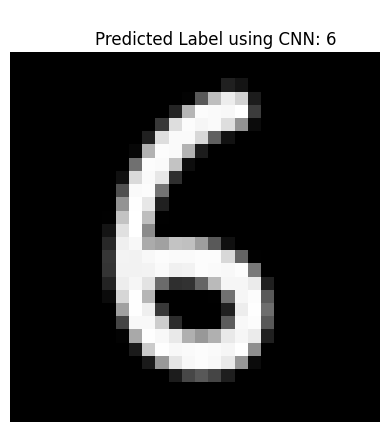

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probability of digit 0: 0.02%
Probability of digit 1: 4.00%
Probability of digit 2: 4.00%
Probability of digit 3: 3.90%
Probability of digit 4: 4.17%
Probability of digit 5: 0.09%
Probability of digit 6: 0.10%
Probability of digit 7: 82.77%
Probability of digit 8: 0.48%
Probability of digit 9: 0.47%


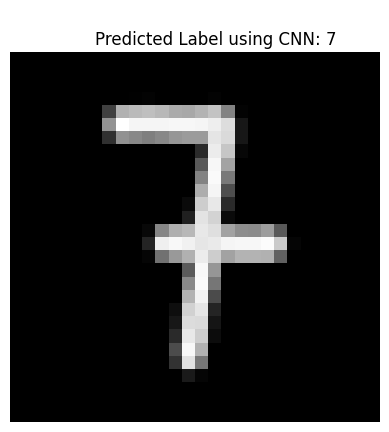

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Probability of digit 0: 0.01%
Probability of digit 1: 99.74%
Probability of digit 2: 0.01%
Probability of digit 3: 0.00%
Probability of digit 4: 0.05%
Probability of digit 5: 0.03%
Probability of digit 6: 0.03%
Probability of digit 7: 0.03%
Probability of digit 8: 0.09%
Probability of digit 9: 0.01%


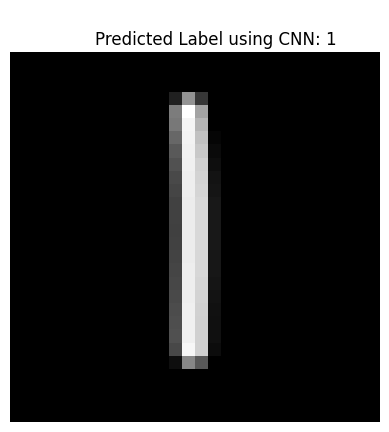

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probability of digit 0: 0.00%
Probability of digit 1: 0.56%
Probability of digit 2: 0.08%
Probability of digit 3: 0.02%
Probability of digit 4: 66.41%
Probability of digit 5: 0.04%
Probability of digit 6: 0.01%
Probability of digit 7: 0.17%
Probability of digit 8: 1.14%
Probability of digit 9: 31.55%


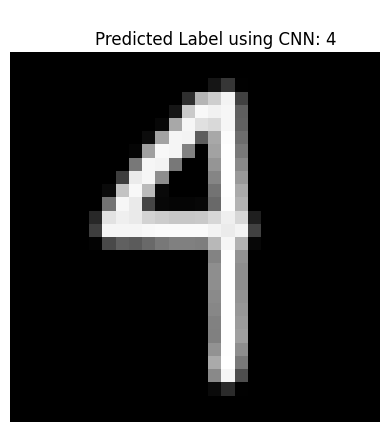

In [17]:
# convert an image I drew to test the model with

# Directory containing images
directory = "images/"

# Iterate through each image in the directory
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        # Load the handwritten image as grayscale
        image = Image.open(os.path.join(directory, filename)).convert("L")

        # Resize the image to 28x28 pixels
        image = image.resize((28, 28))

        # Invert the pixel values
        image = ImageOps.invert(image)

        # Convert the image to a numpy array
        image_array = np.array(image)

        # Flatten the image array
        image_flattened = image_array.flatten()

        # Scale the pixel values to the range [0, 1]
        # this is equivalent to using the MinMaxScaler()
        image_scaled = image_flattened / 255.0

        # Predict the label using the trained models
        '''predicted_label_svm = svm_classifier.predict([image_scaled])[0]
        predicted_label_gbt = clf_gbt.predict([image_scaled])[0]'''

        # Predict with CNN
        ni = image_scaled.reshape(-1, 28, 28, 1)
        logits = model.predict([ni])[0]
        predicted_label_cnn = np.argmax(logits) # make the prediction the index with highest value
        # Display the percentages 
        probs = np.exp(logits) / np.sum(np.exp(logits)) # Apply softmax function
        percentages = probs * 100 # Convert to percentages
        for i, percentage in enumerate(percentages):
            print(f"Probability of digit {i}: {percentage:.2f}%")

        # define an image that can be shown to compare to the prediction
        image_to_show = image_scaled.reshape(28, 28)

        # Display the image along with the predicted labels
        plt.imshow(image_to_show, cmap='gray')
        plt.axis('off')
        plt.title(f'\n\
        Predicted Label using CNN: {predicted_label_cnn}')
        plt.show()
